<a href="https://colab.research.google.com/github/BrianKipngeno/WEEK_9_IP/blob/main/Titanic_Survival_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Defining the Research Problem

## Specifying the Research Question

This analysis aims to develop a prediction model to determine whether or not a passenger would survive on the titanic.

## Defining the Metric for Success

The project will be considered a success when are able to develop a KNN classification model with 75% accuracy.

## Understading the context.

Titanic, in full Royal Mail Ship (RMS) Titanic, was a  British luxury passenger liner that sank in the North Atlantic ocean in April 15, 1912 after hitting an iceberg while on transit from Southampton to NYC. This shipwreck is considered one the deadliest accidents in which more than 1,500 passengers died out of estimated 2,224 passengers and crew members aboard the ship. The incident has remained to be one of the most talked about history points with several movies and books being developed to narrate the story. 

This analysis aims to use Titanic data available to come up with a model that can predict whether a passenger survived or not. The analysis uses a K-Nearest Neighbors Classifier to build the prediction model.

## Recording the Experimental Design

Below are the steps that will be conducted in this analysis in order to respond to the research question comprehensively:

- Load data and preview preliminary characteristics
- Data Cleaning 
- EDA
- Implementing the Solution
- Challenging the Solution
- Follow Up Questions

## Data Relevance

The dataset available was sourced online and contains relevant information that can allow us to respond to the research question satisfactorily. Some of the attributes in the dataset include passenger id, age, gender, name and  whether they survived or not. The total number of attributes are 12 while the number of records 891.
 some of the feature description include:

Below are the columns

pclass - Passenger Class (1 = 1st; 2 = 2nd; 3 = 3rd)

survived - Survival (0 = No, 1 = Yes)

name - Name of the passenger

sex - Gender/sex

age - Age of the passenger

sibsp - Number of siblings/spouses aboard

parch - Number of parents/children aboard

fare - Passenger fare

embarked - Port of embarkation (Cherboug, Queenstown, Southampton)

sibsp - Number of siblings/spouses aboard

parch - Number of parents/children aboard

fare - Passenger fare

embarked - Port of embarkation (Cherboug, Queenstown, Southampton)

# Importing Relevant Libraries

In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import  accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.metrics.pairwise import cosine_similarity
import heapq
from collections import Counter

# Reading the Data

In [17]:
# Reading the data from the csv file

titanic = pd.read_csv('train (5).csv',index_col='PassengerId')
titanic

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S


# Checking the Data

In [18]:
# Checking the top 5 records

titanic.head(5)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [19]:
# Checking the last 5 records

titanic.tail(5)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [20]:
# Confirming number of records and columns

titanic.shape

(891, 11)

the dattaset has 11 columns and 891 columns

In [21]:
#checking the columns
titanic.columns

Index(['Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket',
       'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [22]:
# Checking the attributes data type

titanic.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


In [23]:
# Checking number of unique variables for each column

titanic.nunique()

Survived      2
Pclass        3
Name        891
Sex           2
Age          88
SibSp         7
Parch         7
Ticket      681
Fare        248
Cabin       147
Embarked      3
dtype: int64

In [24]:
# Checking all unique column values 

for i in titanic.columns:
  
  print(i)
  print(titanic[i].unique())

Survived
[0 1]
Pclass
[3 1 2]
Name
['Braund, Mr. Owen Harris'
 'Cumings, Mrs. John Bradley (Florence Briggs Thayer)'
 'Heikkinen, Miss. Laina' 'Futrelle, Mrs. Jacques Heath (Lily May Peel)'
 'Allen, Mr. William Henry' 'Moran, Mr. James' 'McCarthy, Mr. Timothy J'
 'Palsson, Master. Gosta Leonard'
 'Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)'
 'Nasser, Mrs. Nicholas (Adele Achem)' 'Sandstrom, Miss. Marguerite Rut'
 'Bonnell, Miss. Elizabeth' 'Saundercock, Mr. William Henry'
 'Andersson, Mr. Anders Johan' 'Vestrom, Miss. Hulda Amanda Adolfina'
 'Hewlett, Mrs. (Mary D Kingcome) ' 'Rice, Master. Eugene'
 'Williams, Mr. Charles Eugene'
 'Vander Planke, Mrs. Julius (Emelia Maria Vandemoortele)'
 'Masselmani, Mrs. Fatima' 'Fynney, Mr. Joseph J' 'Beesley, Mr. Lawrence'
 'McGowan, Miss. Anna "Annie"' 'Sloper, Mr. William Thompson'
 'Palsson, Miss. Torborg Danira'
 'Asplund, Mrs. Carl Oscar (Selma Augusta Emilia Johansson)'
 'Emir, Mr. Farred Chehab' 'Fortune, Mr. Charles Alexander'
 'O\'D

# Data Cleaning

In [25]:
# Checking for duplicates

titanic.duplicated().sum()

0

- there are no duplicate records in the dataset

In [26]:
# Check for missing data

titanic.isnull().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

In [27]:
# Dropping the Cabin attribute since it has only 204 records available

titanic = titanic.drop(columns=['Cabin'])

We dropped the titanic column because it contains 687 miisng records out of 891 records.

In [29]:
#Filling missing values for age with the mean
titanic['Age'] = titanic['Age'].fillna(titanic['Age'].mean())

In [30]:
#dropping the remaining two missing values in embarked column
titanic = titanic.dropna()

In [34]:
#checking if there is any other missing values
titanic.isnull().sum()

Survived    0
Pclass      0
Name        0
Sex         0
Age         0
SibSp       0
Parch       0
Ticket      0
Fare        0
Embarked    0
dtype: int64

all the missing values have been dealt with.

- The name column seems irrelevant for this analysis so we can drop it now.


In [35]:
# Dropping name column

titanic = titanic.drop(columns=['Name'])

titanic.sample(n=7)

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
PassengerId,,,,,,,,,
763,1,3,male,20.000000,0,0,2663,7.2292,C
575,0,3,male,16.000000,0,0,A/4. 20589,8.0500,S
389,0,3,male,29.699118,0,0,367655,7.7292,Q
155,0,3,male,29.699118,0,0,Fa 265302,7.3125,S
670,1,1,female,29.699118,1,0,19996,52.0000,S
845,0,3,male,17.000000,0,0,315090,8.6625,S
628,1,1,female,21.000000,0,0,13502,77.9583,S


Outliers

In [39]:
titanic.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
PassengerId,,,,,,,,,
1,0,3,male,22.0,1,0,A/5 21171,7.2500,S
2,1,1,female,38.0,1,0,PC 17599,71.2833,C
3,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,S
4,1,1,female,35.0,1,0,113803,53.1000,S
5,0,3,male,35.0,0,0,373450,8.0500,S


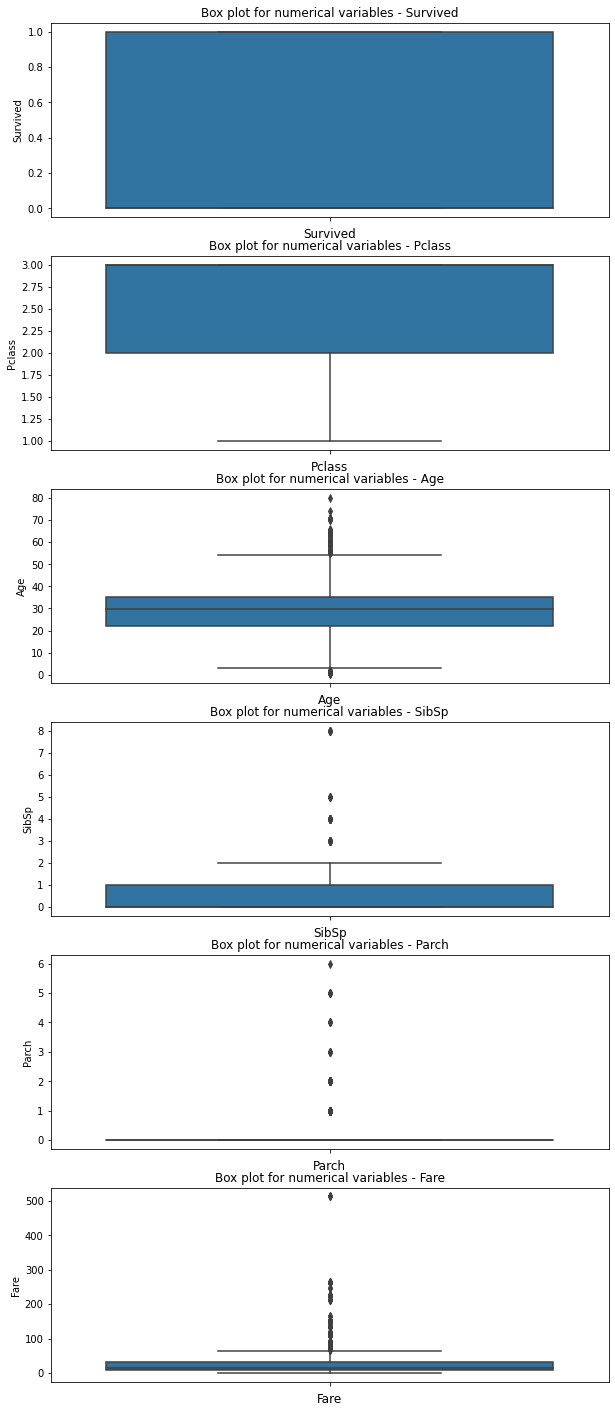

In [38]:
# checking and dealing with outliers 

col_names= ['Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare']

fig, ax = plt.subplots(len(col_names), figsize=(10,25))

for i, col_val in enumerate(col_names):

    sns.boxplot(y=titanic[col_val], ax=ax[i])
    ax[i].set_title('Box plot for numerical variables - {}'.format(col_val), fontsize=12)
    ax[i].set_xlabel(col_val, fontsize=12)

plt.show()

- The age, parch and subsp fare columns have outliers. We will keep these records in the analysis but perform feature scaling later on before modelling.

# Exploratory Data Analysis

## Univariate Analysis

In [41]:
# Checking data descriptive statistics

titanic.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000
mean,0.382452,2.311586,29.653446,0.524184,0.382452,32.096681
std,0.486260,0.834700,12.968366,1.103705,0.806761,49.697504
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,22.000000,0.000000,0.000000,7.895800
50%,0.000000,3.000000,29.699118,0.000000,0.000000,14.454200
75%,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [42]:

# Finding the mean
titanic[['Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare']].mean()

Survived     0.382452
Pclass       2.311586
Age         29.653446
SibSp        0.524184
Parch        0.382452
Fare        32.096681
dtype: float64

In [45]:
# Finding the standard deviation
for column in col_names:
  print('\n')
  print(column + ', Standard deviation: '+ str(titanic[column].std()))
  print(column + ', Variance: '+ str(titanic[column].var()))
  print(column + ', Skewness: '+ str(titanic[column].skew()))
  print(column + ', Kurtosis: '+ str(titanic[column].kurt()))



Survived, Standard deviation: 0.48625968831477473
Survived, Variance: 0.23644848447998187
Survived, Skewness: 0.4845676297760328
Survived, Kurtosis: -1.7691794454365986


Pclass, Standard deviation: 0.8346997785705771
Pclass, Variance: 0.6967237203457705
Pclass, Skewness: -0.6369977585999191
Pclass, Kurtosis: -1.2694374832322646


Age, Standard deviation: 12.968366309252332
Age, Variance: 168.17852473095093
Age, Skewness: 0.43172026491227716
Age, Kurtosis: 0.9790065453677568


SibSp, Standard deviation: 1.1037048755969272
SibSp, Variance: 1.2181644524164283
SibSp, Skewness: 3.6910576308362284
SibSp, Kurtosis: 17.838972378994782


Parch, Standard deviation: 0.8067607445174743
Parch, Variance: 0.6508628988943893
Parch, Skewness: 2.74516012611158
Parch, Kurtosis: 9.750591705579096


Fare, Standard deviation: 49.69750431670801
Fare, Variance: 2469.8419353092113
Fare, Skewness: 4.801440211044194
Fare, Kurtosis: 33.508477269700144


In [47]:
# Interquantile range

for column in col_names:
  print('\n')
  print(titanic[column].quantile([0.25, 0.5, 0.75]))



0.25    0.0
0.50    0.0
0.75    1.0
Name: Survived, dtype: float64


0.25    2.0
0.50    3.0
0.75    3.0
Name: Pclass, dtype: float64


0.25    22.000000
0.50    29.699118
0.75    35.000000
Name: Age, dtype: float64


0.25    0.0
0.50    0.0
0.75    1.0
Name: SibSp, dtype: float64


0.25    0.0
0.50    0.0
0.75    0.0
Name: Parch, dtype: float64


0.25     7.8958
0.50    14.4542
0.75    31.0000
Name: Fare, dtype: float64


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


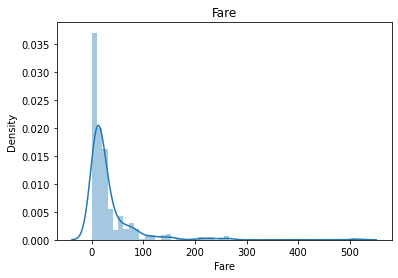

In [49]:
# histogram for fare

sns.distplot(titanic.Fare)
figsize = (10,5)
plt.title('Fare')
plt.show()

In [51]:
titanic.columns


Index(['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare',
       'Embarked'],
      dtype='object')

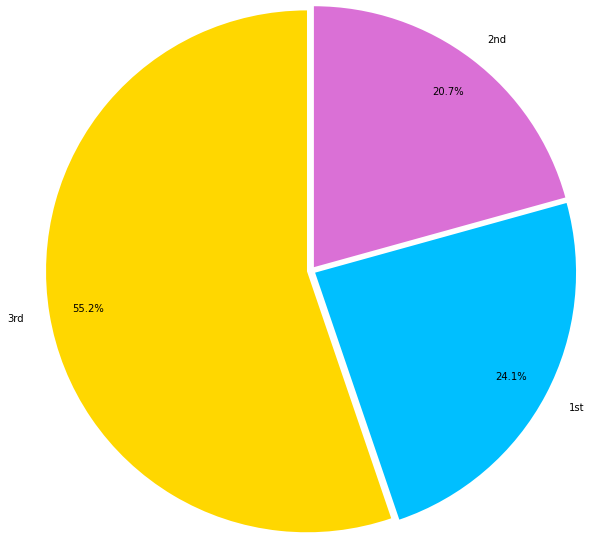

In [53]:
# Checking the proportion of travellers in for the passenger class aboard

class_pie_chart = titanic['Pclass'].value_counts()


#sns.set_style('darkgrid')

labels = ['3rd', '1st', '2nd']
colors = ['gold', 'deepskyblue', 'orchid']
explode = [0.05, 0.05, 0.05]

# Creating the pie chart
plt.pie(class_pie_chart,labels = labels, colors=colors, startangle=90, autopct='%1.1f%%', 
        pctdistance=0.85,center = (0.5,0.5),  explode = explode, radius = 3)
plt.show()

The highest proportion of passengers aboard the titanic purchased 3rd class tickets at 55%, followed by 1st class at 24% and finally 2nd class at 20% of the passengers aboard.

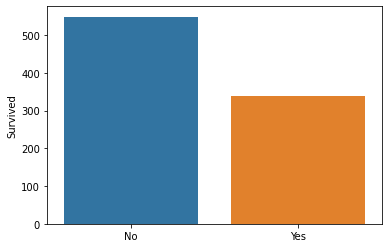

In [55]:
# Counting the number of passengers that survived the shipwreck vs those who did not survive.
survivors =  titanic['Survived'].value_counts()

# Now visualizing this information  in the form of bar plots
labels = ['No', 'Yes']
#colors = ['c', 'alpha']

sns.barplot(x = labels, y = survivors)
plt.show()

Majority of the passengers did not survive the titanic accident.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'SibSp Distribution')

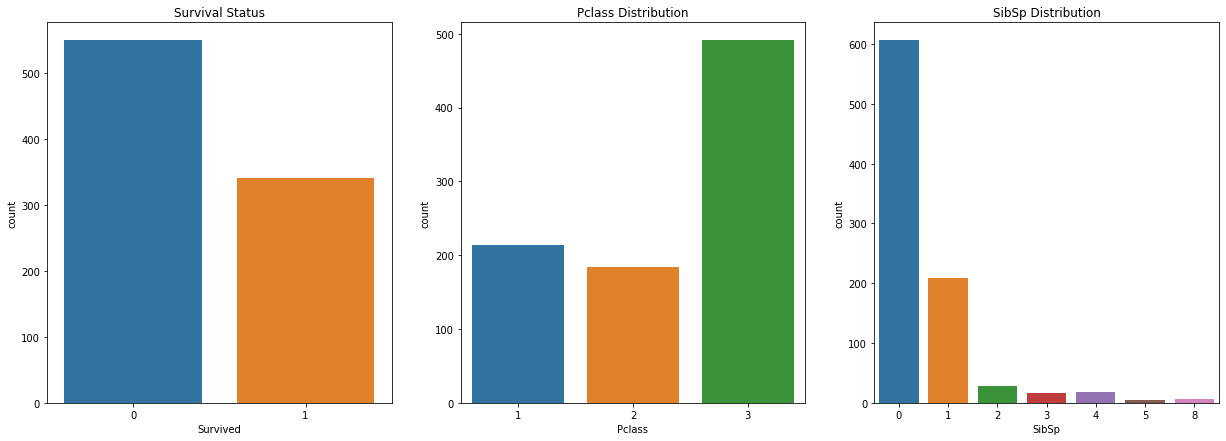

In [56]:
# plotting bar charts to check distributions

fig,ax=plt.subplots(1,3,figsize=(21,7))
sns.countplot('Survived',data=titanic,ax=ax[0])
ax[0].set_title('Survival Status')
sns.countplot('Pclass',data=titanic,ax=ax[1])
ax[1].set_title('Pclass Distribution')
sns.countplot('SibSp',data=titanic,ax=ax[2])
ax[2].set_title('SibSp Distribution')

- We can see the number of casualties was higher than that of survivors.
- Also, most passengers were in the third Pclass while the most popular SibSp was 0.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Embarked Distribution')

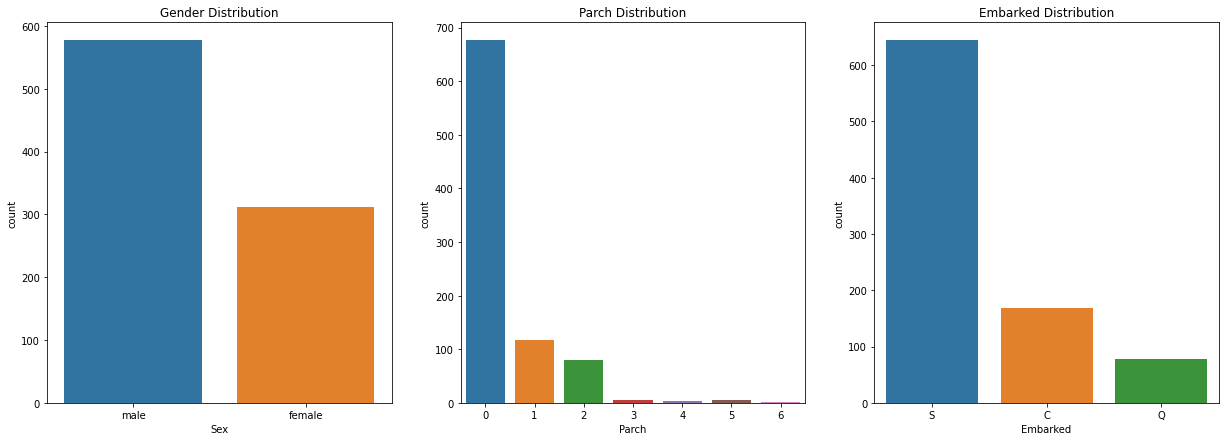

In [57]:
# more bar charts

fig,ax=plt.subplots(1,3,figsize=(21,7))
sns.countplot('Sex',data=titanic,ax=ax[0])
ax[0].set_title('Gender Distribution')
sns.countplot('Parch',data=titanic,ax=ax[1])
ax[1].set_title('Parch Distribution')
sns.countplot('Embarked',data=titanic,ax=ax[2])
ax[2].set_title('Embarked Distribution')

- Most passengers on the Titanic were male and most of the embarked from Southampton.

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

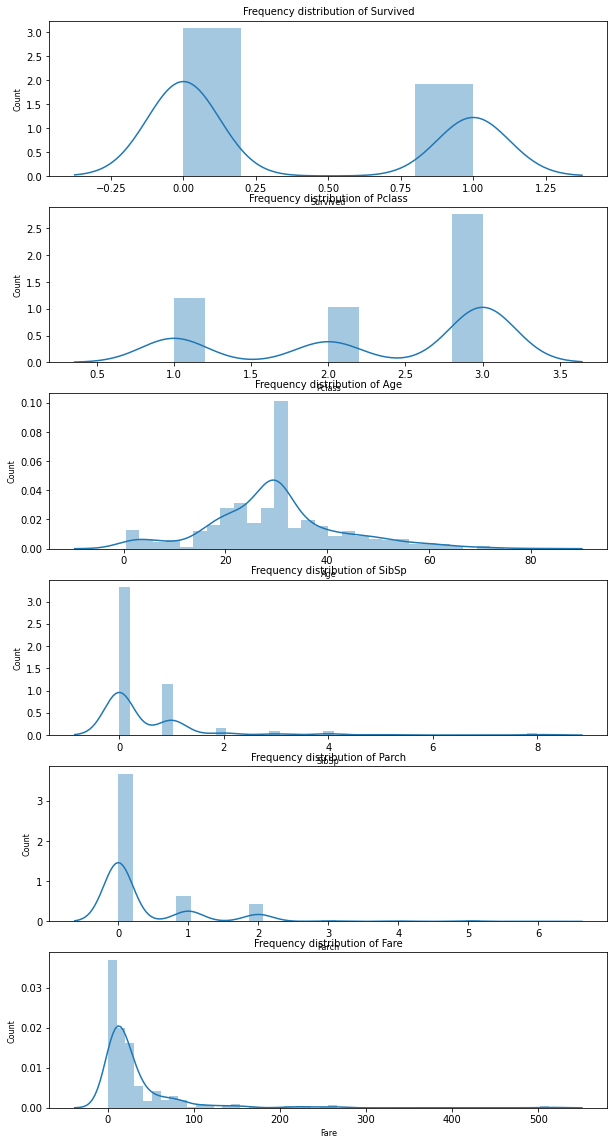

In [58]:
# Frequency distribution plots

col_names = ['Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare']

fig, ax = plt.subplots(len(col_names), figsize=(10,20))

for i, col_val in enumerate(col_names):

    sns.distplot(titanic[col_val], hist=True, ax=ax[i])
    ax[i].set_title('Frequency distribution of '+col_val, fontsize=10)
    ax[i].set_xlabel(col_val, fontsize=8)
    ax[i].set_ylabel('Count', fontsize=8)

plt.show()

- The fare variable has a right skew, with most passengers paying fares between 0 and 50.
- The age variable has a normal distribution.

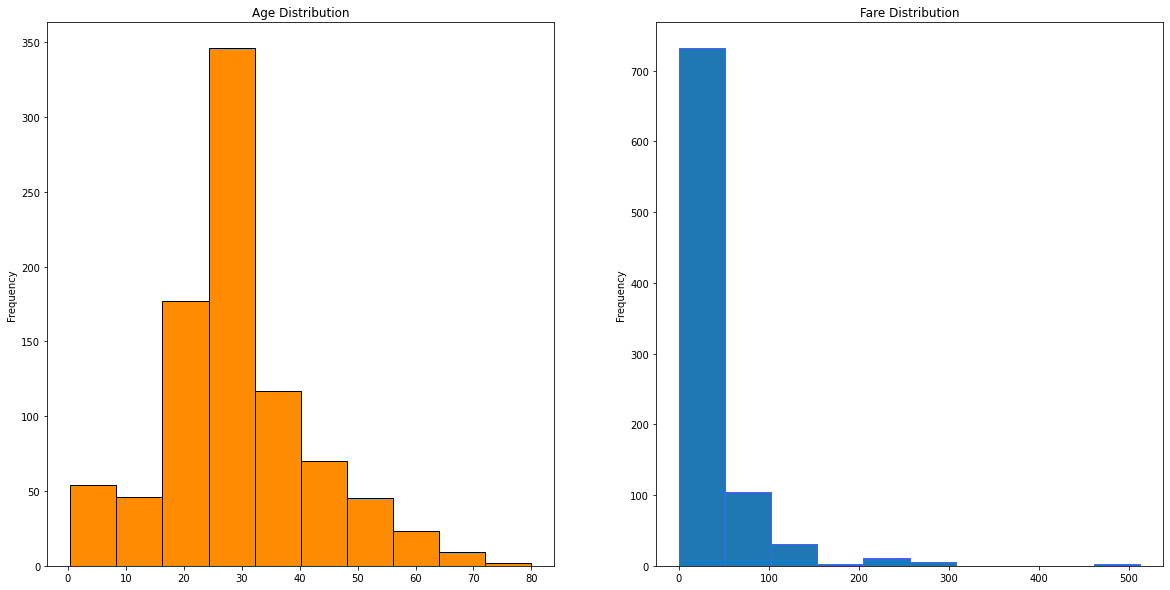

In [59]:
# histograms to show distribution of age and fare

fig, ax=plt.subplots(1,2, figsize=(20,10))
titanic['Age'].plot.hist(ax=ax[0], bins=10, edgecolor='black', color='darkorange')
ax[0].set_title('Age Distribution')

titanic['Fare'].plot.hist(ax=ax[1], bins=10, edgecolor='royalblue')
ax[1].set_title('Fare Distribution')


plt.show()

## Bivariate Analysis

In [60]:
titanic.columns

Index(['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare',
       'Embarked'],
      dtype='object')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


([<matplotlib.axis.XTick at 0x7fc7aed59550>,
 [Text(0, 0, 'No'), Text(0, 0, 'Yes')])

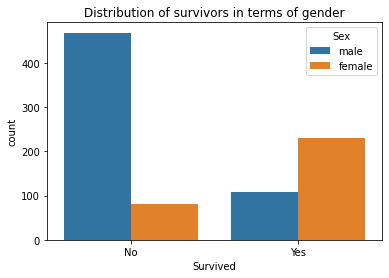

In [61]:
# Distribution of survivors in terms of gender
sns.countplot(titanic['Survived'], hue= titanic['Sex'])
plt.title('Distribution of survivors in terms of gender')
plt.xticks(ticks=[0,1], labels=['No','Yes'])

The number of female passengers who succumbed was smaller than the male passengers while the numbner of female survivors was greater than the make survivors

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


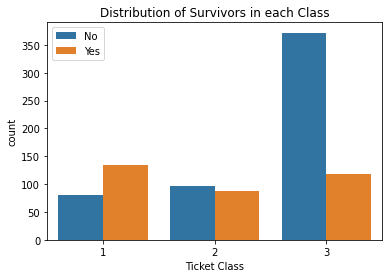

In [64]:
sns.countplot(titanic['Pclass'], hue=titanic['Survived'])
plt.title('Distribution of Survivors in each Class')
plt.xlabel('Ticket Class')
plt.legend(loc='upper left', labels=['No', 'Yes'])

majority of the casualties were from the third class

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 0, 'Ticket Class')

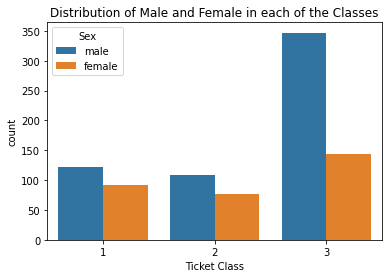

In [65]:
# Distribution of Male and Female in each of the Classes
sns.countplot(titanic['Pclass'], hue=titanic['Sex'])
plt.title('Distribution of Male and Female in each of the Classes')
plt.xlabel('Ticket Class')

the were more male passengers as compared to female passengers in all the passenger classes

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 0, 'Ticket Class')

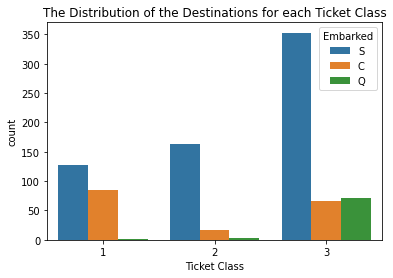

In [66]:
# The Distribution of the Destinations per each Class
sns.countplot(titanic['Pclass'], hue=titanic['Embarked'])
plt.title('The Distribution of the Destinations for each Ticket Class')
plt.xlabel('Ticket Class')

In [67]:
titanic.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
PassengerId,,,,,,,,,
1,0,3,male,22.0,1,0,A/5 21171,7.2500,S
2,1,1,female,38.0,1,0,PC 17599,71.2833,C
3,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,S
4,1,1,female,35.0,1,0,113803,53.1000,S
5,0,3,male,35.0,0,0,373450,8.0500,S


In [68]:
titanic.columns

Index(['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare',
       'Embarked'],
      dtype='object')

In [69]:
#next we'll create a correlation matrix and interpret it using a heatmap to see how each column relates to our target column
#we first convert categorical data to numerical data so that we can creaete a correlation matrix
from sklearn.preprocessing import LabelEncoder
en = LabelEncoder()
titanic['Sex'] = en.fit_transform(titanic['Sex'])
titanic['Ticket'] = en.fit_transform(titanic['Ticket'])
titanic['Embarked'] = en.fit_transform(titanic['Embarked'])

In [70]:
titanic.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
PassengerId,,,,,,,,,
1,0,3,1,22.0,1,0,522,7.2500,2
2,1,1,0,38.0,1,0,595,71.2833,0
3,1,3,0,26.0,0,0,668,7.9250,2
4,1,1,0,35.0,1,0,48,53.1000,2
5,0,3,1,35.0,0,0,471,8.0500,2


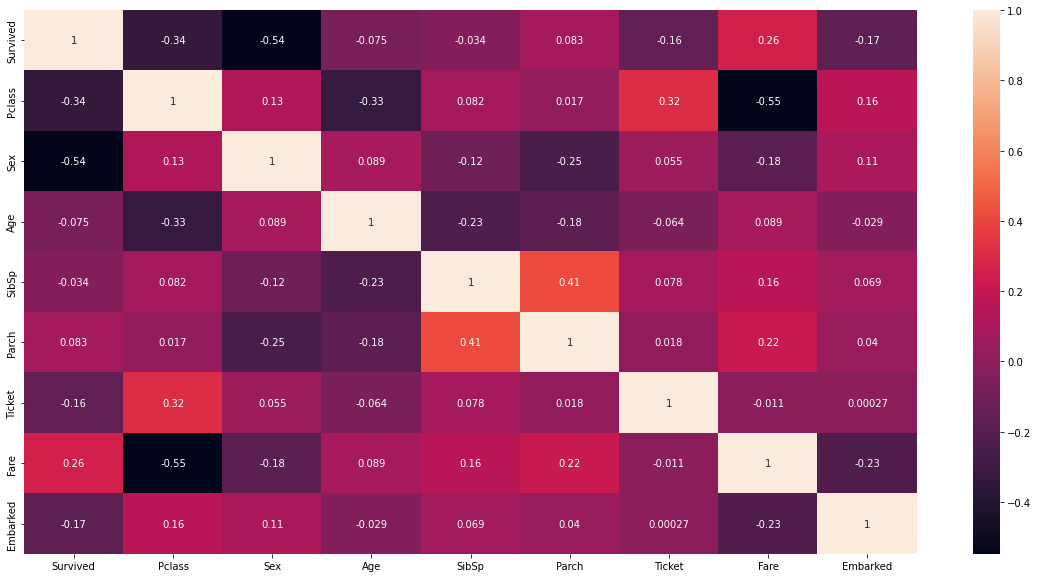

In [71]:
# Plotting the correlation coefficients

plt.figure(figsize=(20,10))
sns.heatmap(titanic.corr(), annot=True)
plt.show()

- The attributes SibSp and Parch have a relatively weak positive correlation. On the other hand, fare and Pclass have a strong negative correlation, which is expected since space seating cost on a ship varies.

# Implementing the Solution

## KNN Classifier

### 80 - 20 Split of the data

In [73]:
# Defining the features and target variable

my_cols = ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare', 'Embarked']

# features
X = titanic[my_cols].values

# target variable
y = titanic['Survived'].values

In [74]:
# Defining the training and tests sets with an 80 - 20 split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [75]:
# Feature Scaling 

scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [76]:
# Training the model

classifier = KNeighborsClassifier(n_neighbors=5)

classifier.fit(X_train, y_train)

KNeighborsClassifier()

In [77]:
# Making predictions

y_pred1 = classifier.predict(X_test)

# Comparing a sample of the prediction

comparison_frame = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_pred1.flatten()})
print(comparison_frame.sample(n=5))
print(comparison_frame.describe())

     Actual  Predicted
79        0          0
57        1          1
125       0          0
128       0          0
154       1          0
           Actual   Predicted
count  178.000000  178.000000
mean     0.410112    0.365169
std      0.493241    0.482836
min      0.000000    0.000000
25%      0.000000    0.000000
50%      0.000000    0.000000
75%      1.000000    1.000000
max      1.000000    1.000000


In [79]:
# Evaluating the model

print(confusion_matrix(y_test, y_pred1))
print(classification_report(y_test, y_pred1))

[[86 19]
 [27 46]]
              precision    recall  f1-score   support

           0       0.76      0.82      0.79       105
           1       0.71      0.63      0.67        73

    accuracy                           0.74       178
   macro avg       0.73      0.72      0.73       178
weighted avg       0.74      0.74      0.74       178



- The model has an accuracy score of 74%. The correct number of predictions are 86 true positives and 46 false negatives while the number of incorrect predictions are 19 false positives and 27 false negatives.

### 70 - 30 Split of the data

In [80]:
# Defining the training and tests sets with 70-30 split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [81]:
# Feature Scaling 

scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [82]:
# Training the model

classifier = KNeighborsClassifier(n_neighbors=5)

classifier.fit(X_train, y_train)

KNeighborsClassifier()

In [83]:
# Making predictions

y_pred2 = classifier.predict(X_test)

# Comparing a sample of the prediction

comparison_frame = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_pred2.flatten()})
print(comparison_frame.sample(n=5))
print(comparison_frame.describe())

     Actual  Predicted
261       1          1
117       1          0
12        1          1
172       0          0
131       0          0
           Actual   Predicted
count  267.000000  267.000000
mean     0.411985    0.337079
std      0.493117    0.473600
min      0.000000    0.000000
25%      0.000000    0.000000
50%      0.000000    0.000000
75%      1.000000    1.000000
max      1.000000    1.000000


In [84]:
# Evaluating the model

print(confusion_matrix(y_test, y_pred2))
print(classification_report(y_test, y_pred2))

[[137  20]
 [ 40  70]]
              precision    recall  f1-score   support

           0       0.77      0.87      0.82       157
           1       0.78      0.64      0.70       110

    accuracy                           0.78       267
   macro avg       0.78      0.75      0.76       267
weighted avg       0.78      0.78      0.77       267



- With a 70-30 split of the data, the model has an accuracy score of 78%. The correct number of predictions are 137 true positives and 70 false negatives while the number of incorrect predictions are 20 false positives and 40 false negatives.

### 60 - 40 Split of the data

In [85]:
# Defining the training and tests sets with 60-40 split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=0)

In [86]:
# Feature Scaling 

scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [87]:
# Training the model

classifier.fit(X_train, y_train)

KNeighborsClassifier()

In [88]:
# Making predictions

y_pred3 = classifier.predict(X_test)

# Comparing a sample of the prediction

comparison_frame = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_pred3.flatten()})
print(comparison_frame.sample(n=5))
print(comparison_frame.describe())

     Actual  Predicted
331       0          0
215       0          0
274       1          0
193       0          0
138       1          1
           Actual   Predicted
count  356.000000  356.000000
mean     0.393258    0.331461
std      0.489161    0.471401
min      0.000000    0.000000
25%      0.000000    0.000000
50%      0.000000    0.000000
75%      1.000000    1.000000
max      1.000000    1.000000


In [89]:
# Evaluating the model

print(confusion_matrix(y_test, y_pred3))
print(classification_report(y_test, y_pred3))

[[188  28]
 [ 50  90]]
              precision    recall  f1-score   support

           0       0.79      0.87      0.83       216
           1       0.76      0.64      0.70       140

    accuracy                           0.78       356
   macro avg       0.78      0.76      0.76       356
weighted avg       0.78      0.78      0.78       356



- For a 60-40 training and test sets split, the model has an accuracy score of 78%. The correct number of predictions are 188 true positives and 90 false negatives while the number of incorrect predictions are 28 false positives and 50 false negatives.

- The model with 70 - 30, 60-40 splits both perform best with an f1- score accuracy of 78%.

## Model Optimization

### LDA

Performing dimensionality reduction with Linear Discriminant Analysis (LDA)

In [108]:
# Splitting the data into features and target variable

X = titanic.drop('Survived', axis = 1)
y = titanic.Survived


# Splitting the data into test and train sets
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state = 10)

# scaling our Data
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)


# Reducing the dimensions in our dataset
# Specifying the number of components
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
lda = LDA()
X_train = lda.fit_transform(X_train, y_train)
X_test = lda.transform(X_test)


# Searching the best parameters using Rnadom Search
params = { 'n_neighbors' : range(1,10),
          'metric' : ['euclidean', 'manhattan', 'minkowski'],
          'weights': ['uniform', 'distance']}
        

from sklearn.model_selection import RandomizedSearchCV
rs = RandomizedSearchCV(KNeighborsClassifier(),
                       params,  cv = 10,
                       n_jobs = -1)
          
rs = rs.fit(X_train, y_train)
rs.best_params_

{'metric': 'manhattan', 'n_neighbors': 8, 'weights': 'uniform'}

### Applying best parameters

In [110]:
# Splitting the data into features and target variable

X = titanic.drop('Survived', axis = 1)
y = titanic.Survived


# Splitting the data into test and train sets

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state = 10)


# scaling our Data
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)


# Reducing the dimensions in our dataset
# Specifying the number of components
lda = LDA()
X_train = lda.fit_transform(X_train, y_train)
X_test = lda.transform(X_test)

# Instantiating our model
# Using our best parameters using random search
knc = KNeighborsClassifier(metric = 'manhattan', n_neighbors= 8, weights = 'uniform')

# Fitting the KNN classifier to our train data set
model2 = knc.fit(X_train, y_train)


# Making prediction the created model
y_pred = model2.predict(X_test)


# Evaluating our model using accuracy score, confusion matrix and classification report.
print(accuracy_score(y_test, y_pred)*100)

81.27340823970037


- the model accuracy improves to 81% model for the optimized model.

# Challenging the Solution

- Given the current dataset size, KNN classifier with a K value of 5 and a training-test split of 70-30 and 60-40 provide a relatively high accuracy classification. LDA improves the model's accuracy.

- For further optimization, other distance metrics such as Euclidean and Minkowski distance metrics can be explored. In addition, different values of K can be used to check for optimal model performance.


# Follow-up Questions

## a) Did we have the right question?

Yes, the research question was specific and clear.

## b) Did we have the right data?

Yes, the data available contained relevant information to train the classification model.

## c) Do we need other data to answer the research question?

=more data to be included in the classification model.